In [1]:
# Importing all the necessary packages

import random
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn

In [2]:
data=pd.read_csv('C:/Users/BHASKAR BOSE/Dropbox/My PC (LAPTOP-7GV3U44E)/Downloads/XMM_ML.csv')
data.head()

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ep_8_fmin,sc_ep_8_fmax,Class
0,1.836559,20.122780,0.508007,408.3659,2.380000e-15,7.000000e-15,9.370000e-15,1.060000e-14,1.970000e-14,4.850000e-14,3.080000e-14,0.389105,-0.002790,-0.401496,-0.120218,0.0,2.650000e-14,9.910000e-14,0
1,87.383962,-21.924875,0.336117,2672.8470,7.140000e-15,1.990000e-14,2.800000e-14,3.040000e-14,5.990000e-14,1.460000e-13,8.370000e-14,0.444257,0.119971,-0.443130,-0.331475,0.0,1.430000e-13,1.490000e-13,0
2,159.945875,-5.116026,0.521204,583.1679,2.380000e-15,7.920000e-15,8.050000e-15,9.410000e-15,4.540000e-15,3.030000e-14,2.890000e-14,0.515240,0.000777,-0.370514,-0.495102,0.0,2.010000e-14,6.730000e-14,0
3,38.766442,32.677084,0.689360,292.4774,7.120000e-16,6.610000e-15,2.400000e-14,6.570000e-14,8.240000e-14,1.860000e-13,7.540000e-14,0.849070,0.559812,-0.026348,-0.400924,0.0,1.580000e-13,2.640000e-13,0
4,141.661199,36.400714,0.309602,2871.4660,2.670000e-15,9.070000e-15,1.980000e-14,4.530000e-14,5.810000e-14,1.360000e-13,6.460000e-14,0.497494,0.319506,-0.113438,-0.504149,0.0,1.360000e-13,1.360000e-13,0


In [3]:
print("Shape of the data is {}".format(data.shape))

Shape of the data is (23017, 19)


In [4]:
data.isnull().sum()

sc_ra             0
sc_dec            0
sc_poserr         0
sc_det_ml         0
sc_ep_1_flux      0
sc_ep_2_flux      0
sc_ep_3_flux      0
sc_ep_4_flux      0
sc_ep_5_flux      0
sc_ep_8_flux      0
sc_ep_9_flux      0
sc_hr1           34
sc_hr2           13
sc_hr3           44
sc_hr4          246
sc_extent         0
sc_ep_8_fmin      0
sc_ep_8_fmax      0
Class             0
dtype: int64

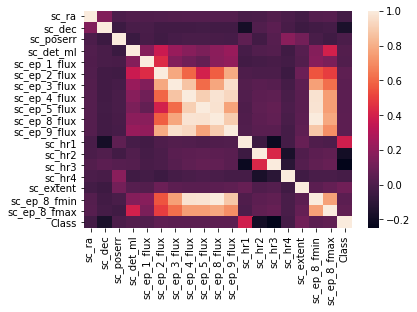

In [5]:
# Some basic EDA to investigate the data

data=data.dropna()
sns.heatmap(data.corr())

In [7]:
# Standardisation for better training results

scaler=preprocessing.StandardScaler()

data.index=np.array(range(22715))
main_data=data[data.columns[0:-1]]
labels=data[data.columns[-1]]
columns=main_data.columns

main_data=scaler.fit_transform(main_data)
main_data

main_data=pd.DataFrame(main_data,columns=columns)
main_data.head()

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ep_8_fmin,sc_ep_8_fmax
0,-1.623851,0.451717,-0.586389,-0.065919,-0.035704,-0.081287,-0.053214,-0.042491,-0.039007,-0.048602,-0.058635,0.033827,0.061084,0.127151,0.302817,-0.16029,-0.045165,-0.061084
1,-0.730777,-0.685126,-0.837420,-0.065047,-0.034653,-0.077546,-0.050662,-0.041457,-0.038055,-0.047158,-0.056369,0.186057,0.370809,0.008002,-0.104440,-0.16029,-0.043378,-0.060547
2,0.026734,-0.230665,-0.567116,-0.065852,-0.035704,-0.081021,-0.053394,-0.042553,-0.039366,-0.048872,-0.058716,0.381981,0.070083,0.215816,-0.419877,-0.16029,-0.045263,-0.061426
3,-1.238321,0.791147,-0.321538,-0.065964,-0.036073,-0.081400,-0.051210,-0.039614,-0.037523,-0.046565,-0.056725,1.303412,1.480530,1.200751,-0.238322,-0.16029,-0.043148,-0.059310
4,-0.164149,0.891823,-0.876142,-0.064970,-0.035640,-0.080687,-0.051785,-0.040679,-0.038098,-0.047306,-0.057187,0.332999,0.874238,0.951518,-0.437319,-0.16029,-0.043485,-0.060687


C:\Users\BHASKAR BOSE\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


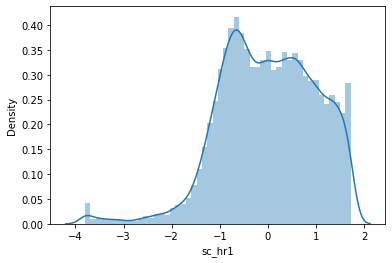

In [8]:
# According to the above plot it seems that sc_hr1 is the most correlated to the Class variable

sns.distplot(main_data['sc_hr1'])

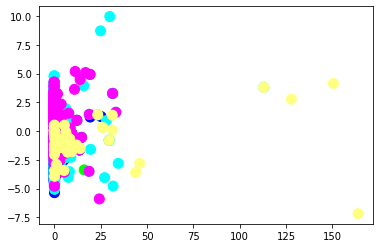

In [9]:
# Lets try to plot the data here according to column
# First we reduce the data into its 2 principal components, after which we plot the data according to its column

pca=PCA(n_components=2)
csv_data=pca.fit_transform(main_data)

c1=(1.0,0.0,0.0,1.0)
c2=(0.0,1.0,0.0,1.0)
c3=(0.0,0.0,1.0,1.0)
c4=(1.0,1.0,0.0,1.0)
c5=(0.0,1.0,1.0,1.0)
c6=(1.0,0.0,1.0,1.0)
c7=(1.0,1.0,0.5,1.0)
colormap=np.array([c1,c2,c3,c4,c5,c6,c7])

label_data=np.array(labels)

plt.scatter(csv_data[:,0], csv_data[:,1],s=100, c=colormap[label_data])
plt.show()

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(main_data, labels, stratify=labels, test_size=0.2)

In [39]:
X_train

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ep_8_fmin,sc_ep_8_fmax
158,-1.019534,1.373604,1.596765,-0.065999,-0.036157,-0.082665,-0.053337,-0.041849,-0.038598,-0.048271,-0.057616,1.029819,1.375794,1.200827,-0.277492,-0.16029,-0.044484,-0.061387
18062,1.387640,1.105008,1.171908,-0.066074,-0.036230,-0.083154,-0.054424,-0.043038,-0.039366,-0.049221,-0.059861,1.720004,-0.749473,-1.027565,1.907830,-0.16029,-0.045468,-0.062077
22612,0.063420,1.460996,-0.907133,-0.065406,-0.035150,-0.081389,-0.053597,-0.042671,-0.039369,-0.048921,-0.058772,-0.668926,0.069400,-0.106771,-0.393392,-0.16029,-0.045402,-0.061658
8213,-1.442109,-0.080191,1.145095,-0.066064,-0.035578,-0.082566,-0.054024,-0.042538,-0.039474,-0.049017,-0.059363,-1.665767,0.576351,0.994591,-1.393211,-0.16029,-0.045257,-0.061929
9242,-0.091580,-0.646497,0.775867,-0.065921,-0.035777,-0.081148,-0.053031,-0.042167,-0.038321,-0.048005,-0.058151,0.372143,0.458863,0.469108,0.138613,-0.16029,-0.044209,-0.061195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11416,0.951042,1.455895,-0.718493,-0.065844,-0.034542,-0.078445,-0.053685,-0.042996,-0.039472,-0.048831,-0.058489,0.021876,-1.275144,-1.146826,0.027586,-0.16029,-0.045097,-0.061097
3648,0.403027,1.731996,-0.622952,-0.065780,-0.033690,-0.079721,-0.052895,-0.042214,-0.039154,-0.048367,-0.058489,-1.088990,-0.131954,0.412811,-0.706264,-0.16029,-0.044583,-0.061457
22596,-0.800645,-1.970776,-0.601943,-0.065478,-0.035863,-0.081047,-0.050758,-0.039614,-0.034951,-0.044877,-0.056408,0.534579,1.336401,0.948686,0.231485,-0.16029,-0.042826,-0.056911
21761,-0.963468,-1.576799,0.119119,-0.066039,-0.036105,-0.082584,-0.053882,-0.042964,-0.039462,-0.049161,-0.057920,0.712313,0.588627,-0.945360,-0.825888,-0.16029,-0.045405,-0.062034


In [11]:
# For the data to be consumed by the Bayesian NN, we first need to convert into np arrays

train_data=np.array(X_train)
train_labels=np.array(Y_train)
test_data=np.array(X_test)
test_labels=np.array(Y_test)

In [13]:
# Here we use the torch.from_numpy function to convert the np arrays into tensors

x_train, y_train = torch.from_numpy(train_data).float(), torch.from_numpy(train_labels).long()
x_test, y_test = torch.from_numpy(test_data).float(), torch.from_numpy(test_labels).long()
x_train.shape, y_train.shape

(torch.Size([18172, 18]), torch.Size([18172]))

In [31]:
# The structure of the Bayesian NN along with Crossentropy loss and KL Divergence Loss for Bayesian Neural Networks

model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=18, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=7),
)
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)
kl_weight = 0.1

print(model)

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=18, out_features=100, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=200, bias=True)
  (3): ReLU()
  (4): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=7, bias=True)
)


In [34]:
# Training the Bayesian NN for 2000 iterations

from tqdm import tqdm
for step in tqdm(range(2000)):
    
    pre = model(x_train)
    ce = ce_loss(pre, y_train)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

pre = model(x_test)
_, predicted = torch.max(pre.data, 1)

total = y_test.size(0)
correct = (predicted == y_test).sum()

print('- Accuracy: %f %%' % (100 * float(correct) / total))
Accuracy1 = 100 * float(correct) / total
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

100%|████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 11881881.02it/s]

- Accuracy: 76.365430 %
- CE : 0.50, KL : 0.53


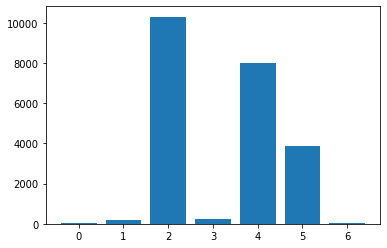

In [18]:
# Inspecting Class imbalance, here class 2 has the largest number of instances

labels_df=pd.DataFrame(labels)
labels_df.groupby('Class').size()
plt.bar(labels_df.groupby('Class').size().index,labels_df.groupby('Class').size())
plt.show()

In [ ]:
# Defining the SMOTE and SMOTEENN variables for oversampling of the data.

smt=SMOTE(sampling_strategy={0:2000, 1:2000, 3:2000, 6:2000})
smteen=SMOTEENN(sampling_strategy={0:2000, 1:2000, 3:2000, 6:2000})

# Oversampling the Data using SMOTE

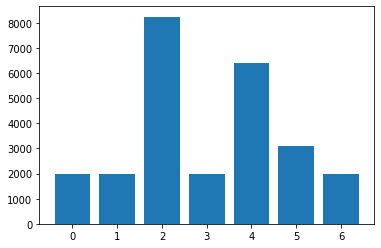

In [19]:
# Visualizing the data after transformation takes place. We see that the deficient classes 0, 1, 3, 6 have increased in number.

X,Y=smt.fit_resample(X_train,Y_train)

labels_df=pd.DataFrame(Y)
labels_df.groupby('Class').size()
plt.bar(labels_df.groupby('Class').size().index,labels_df.groupby('Class').size())
plt.show()

In [20]:
# Same as above

train_data=np.array(X)
train_labels=np.array(Y)
test_data=np.array(X_test)
test_labels=np.array(Y_test)

In [21]:
x_train, y_train = torch.from_numpy(train_data).float(), torch.from_numpy(train_labels).long()
x_test, y_test = torch.from_numpy(test_data).float(), torch.from_numpy(test_labels).long()
x_train.shape, y_train.shape

(torch.Size([25756, 18]), torch.Size([25756]))

In [30]:
# defining a new Bayesian NN with similar architecture

model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=18, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=7),
)
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)
kl_weight = 0.1

print(model)

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=18, out_features=100, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=200, bias=True)
  (3): ReLU()
  (4): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=7, bias=True)
)


In [37]:
# Training the NN in a similar fashion

for step in tqdm(range(2000)):
    
    pre = model(x_train)
    ce = ce_loss(pre, y_train)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

pre = model(x_test)
_, predicted = torch.max(pre.data, 1)

total = y_test.size(0)
correct = (predicted == y_test).sum()

print('- Accuracy: %f %%' % (100 * float(correct) / total))
Accuracy2 = 100 * float(correct) / total
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))


100%|████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 12104773.45it/s]

- Accuracy: 78.673780 %
- CE : 0.43, KL : 0.65


# Oversampling the Data using SMOTEENN

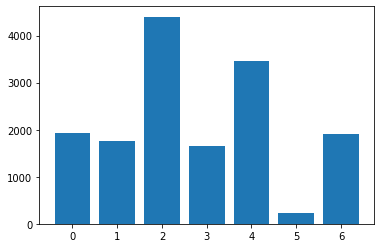

In [24]:
# Oversampling the data using SMOTEENN and then visualizing

X,Y=smteen.fit_resample(X_train,Y_train)

labels_df=pd.DataFrame(Y)
labels_df.groupby('Class').size()
plt.bar(labels_df.groupby('Class').size().index,labels_df.groupby('Class').size())
plt.show()

In [25]:
train_data=np.array(X)
train_labels=np.array(Y)
test_data=np.array(X_test)
test_labels=np.array(Y_test)

In [26]:
x_train, y_train = torch.from_numpy(train_data).float(), torch.from_numpy(train_labels).long()
x_test, y_test = torch.from_numpy(test_data).float(), torch.from_numpy(test_labels).long()
x_train.shape, y_train.shape

(torch.Size([15377, 18]), torch.Size([15377]))

In [29]:
# Defining a new Bayesian NN for this task

model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=18, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=7),
)
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)
kl_weight = 0.1

print(model)

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=18, out_features=100, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=200, bias=True)
  (3): ReLU()
  (4): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=7, bias=True)
)


In [38]:
# training on SMOTEENN data

for step in tqdm(range(2000)):
    
    pre = model(x_train)
    ce = ce_loss(pre, y_train)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

pre = model(x_test)
_, predicted = torch.max(pre.data, 1)

total = y_test.size(0)
correct = (predicted == y_test).sum()

print('- Accuracy: %f %%' % (100 * float(correct) / total))
Accuracy3 = 100 * float(correct) / total
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))


100%|██████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<?, ?it/s]

- Accuracy: 72.674894 %
- CE : 0.05, KL : 1.29


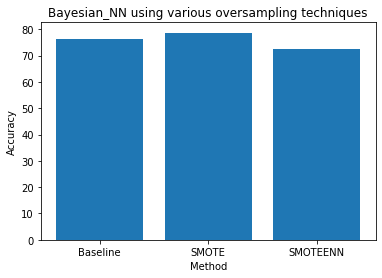

In [44]:
# A final comparison of various techniques, the first one involves no oversampling, while the others do.
# It seems that SMOTEENN results in a reduced accuracy, perhaps because some important samples are undersampled and eliminated.

plt.bar(['Baseline','SMOTE','SMOTEENN'],[Accuracy1, Accuracy2, Accuracy3])
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.title('Bayesian_NN using various oversampling techniques')
plt.show()

In [46]:
# For the final experiment, we take a normal RF_classifier and train the maodel using normal data (no oversampling).
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)

# performing predictions on the test dataset
y_pred_rf1 = clf.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE Random_Forest_Classifier: ", metrics.accuracy_score(Y_test, y_pred_rf1))

ACCURACY OF THE Random_Forest_Classifier:  74.937282892


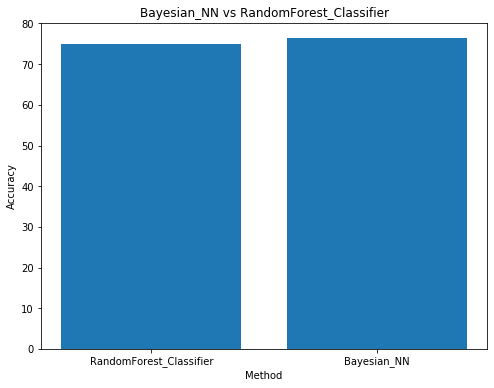

In [52]:
# Surprisingly a Bayesian NN perfroms better than a Random Forest Classifier on the imbalanced data.

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)

plt.bar(['RandomForest_Classifier','Bayesian_NN'],[metrics.accuracy_score(Y_test, y_pred_rf1), Accuracy1])
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.title('Bayesian_NN vs RandomForest_Classifier')
plt.show()